# NK annotations by Van Galen et al. 2019

Sample description:
- Easigenomics dataset
- Aplastic anemia
- follow up
- BM blasts = 0 %

### Reference:
van Galen, P., Hovestadt, V., Wadsworth Ii, M. H., Hughes, T. K., Griffin, G. K., Battaglia, S., Verga, J. A., Stephansky, J., Pastika, T. J., Lombardi Story, J., Pinkus, G. S., Pozdnyakova, O., Galinsky, I., Stone, R. M., Graubert, T. A., Shalek, A. K., Aster, J. C., Lane, A. A., & Bernstein, B. E. (2019). Single-Cell RNA-Seq Reveals AML Hierarchies Relevant to Disease Progression and Immunity. Cell, 176(6), 1265–1281.e24. https://doi.org/10.1016/j.cell.2019.01.031

T and NK cell markers:

- t_ctl =["CD3D", "CD3G"]
- t_ctl_nk= ["IL32", "IL7R"]
- t_cell = ["TCF7"]
- ctl_nk = ["CCL5"]
- ctl = ["GZMK"]
- nk = ["KLRB1", "KLRD1", "GZMB", "NCAM1"]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#all datasets
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [4]:
adata1=adata.copy()

In [5]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [6]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [7]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

## T and  NK cell markers

In [8]:
t_ctl =["CD3D", "CD3G"]
t_ctl_nk= ["IL32", "IL7R"]
t_cell = ["TCF7"]
ctl_nk = ["CCL5"]
ctl = ["GZMK"]
nk = ["KLRB1", "KLRD1", "GZMB", "NCAM1"]

In [9]:
listOfGenes= t_ctl

t_ctl=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        t_ctl.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD3D No
CD3G No
['CD3D', 'CD3G']


In [10]:
listOfGenes=t_ctl_nk

t_ctl_nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        t_ctl_nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

IL32 No
IL7R Yes
['IL32', 'IL7R']


In [11]:
listOfGenes=t_cell

t_cell=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        t_cell.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

TCF7 Yes
['TCF7']


In [12]:
listOfGenes=ctl_nk
ctl_nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        ctl_nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CCL5 Yes
['CCL5']


In [13]:
listOfGenes=ctl
ctl=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        ctl.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

GZMK No
['GZMK']


In [14]:
listOfGenes=nk
nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

KLRB1 No
KLRD1 No
GZMB Yes
NCAM1 No
['KLRB1', 'KLRD1', 'GZMB', 'NCAM1']


In [15]:
#list of lists into a one list

vangalen_markers=[t_ctl,t_ctl_nk, t_cell, ctl_nk, ctl, nk]
vangalen_markers = list(np.concatenate(vangalen_markers).flat)


## UMAPs

In [78]:
sc.settings.set_figure_params(dpi=150)

In [ ]:
#t_ctl and ctl marker genes not in our data

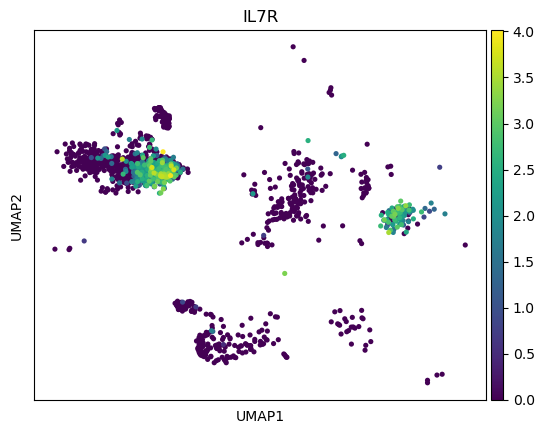

In [17]:
sc.pl.umap(adata1, color = t_ctl_nk, color_map = 'viridis', ncols = 1)

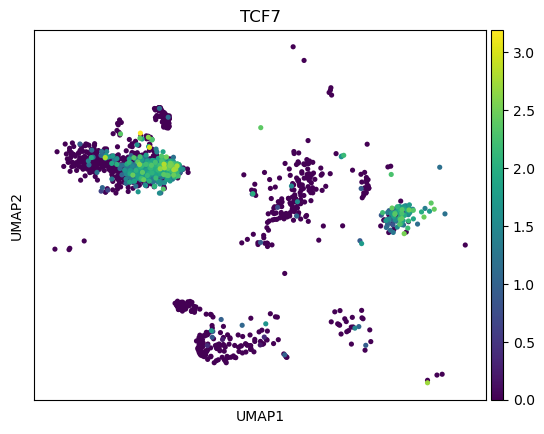

In [18]:
sc.pl.umap(adata1, color = t_cell, color_map = 'viridis', ncols = 1)

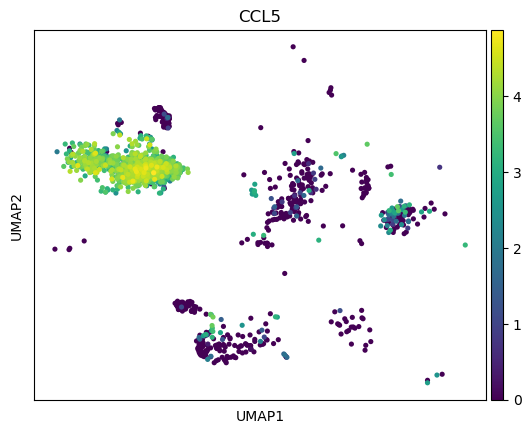

In [19]:
sc.pl.umap(adata1, color = ctl_nk, color_map = 'viridis', ncols = 1)

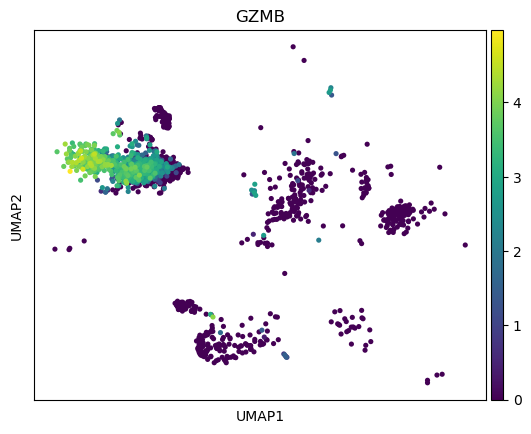

In [20]:
sc.pl.umap(adata1, color = nk, color_map = 'viridis', ncols = 1)

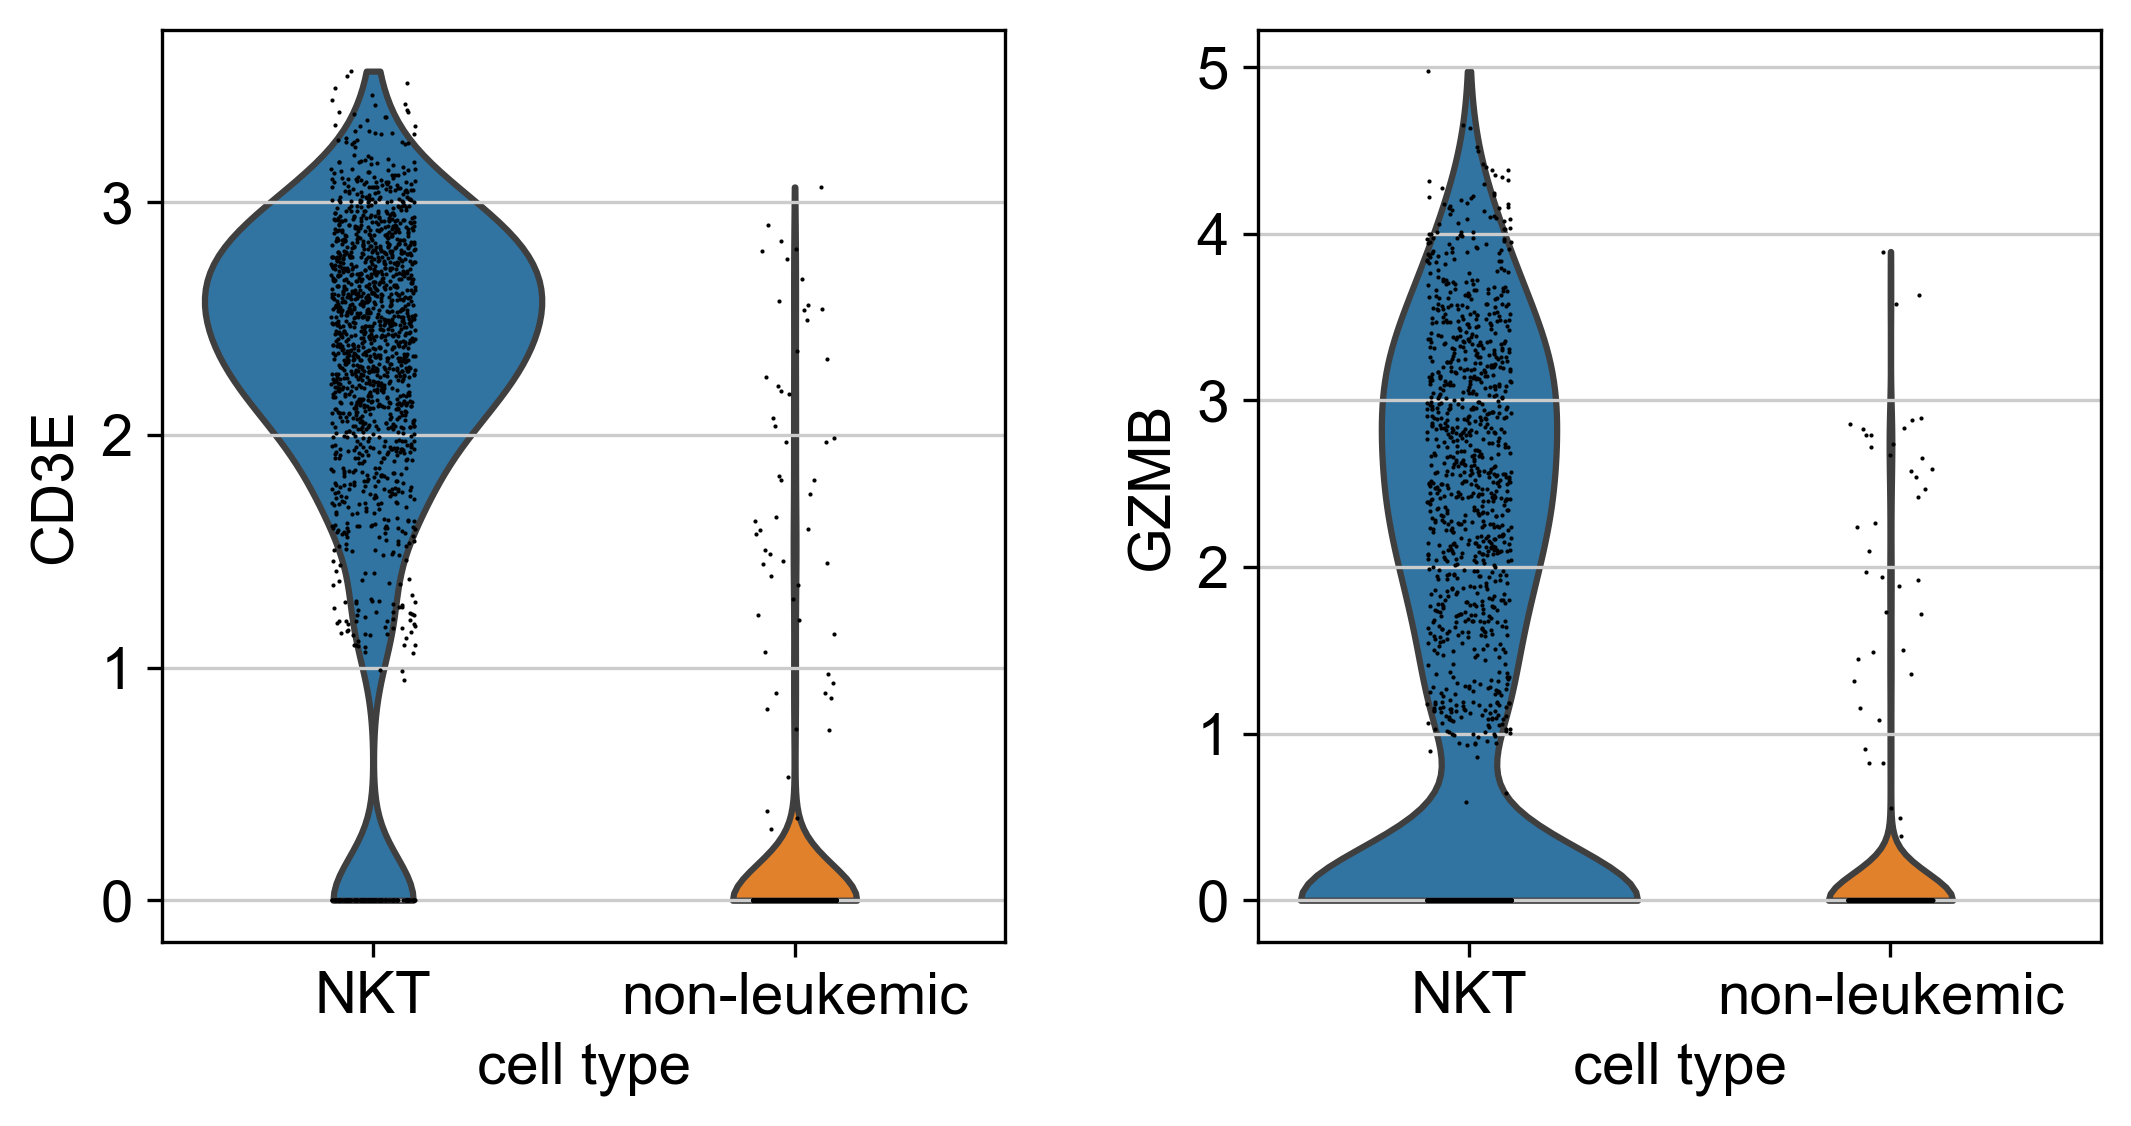

In [97]:
sc.pl.violin(adata, keys= t_ctl_nk, groupby= 'cell_type', scale = 'count')

vangalen_markers=[t_ctl,t_ctl_nk, t_cell, ctl_nk, ctl, nk]


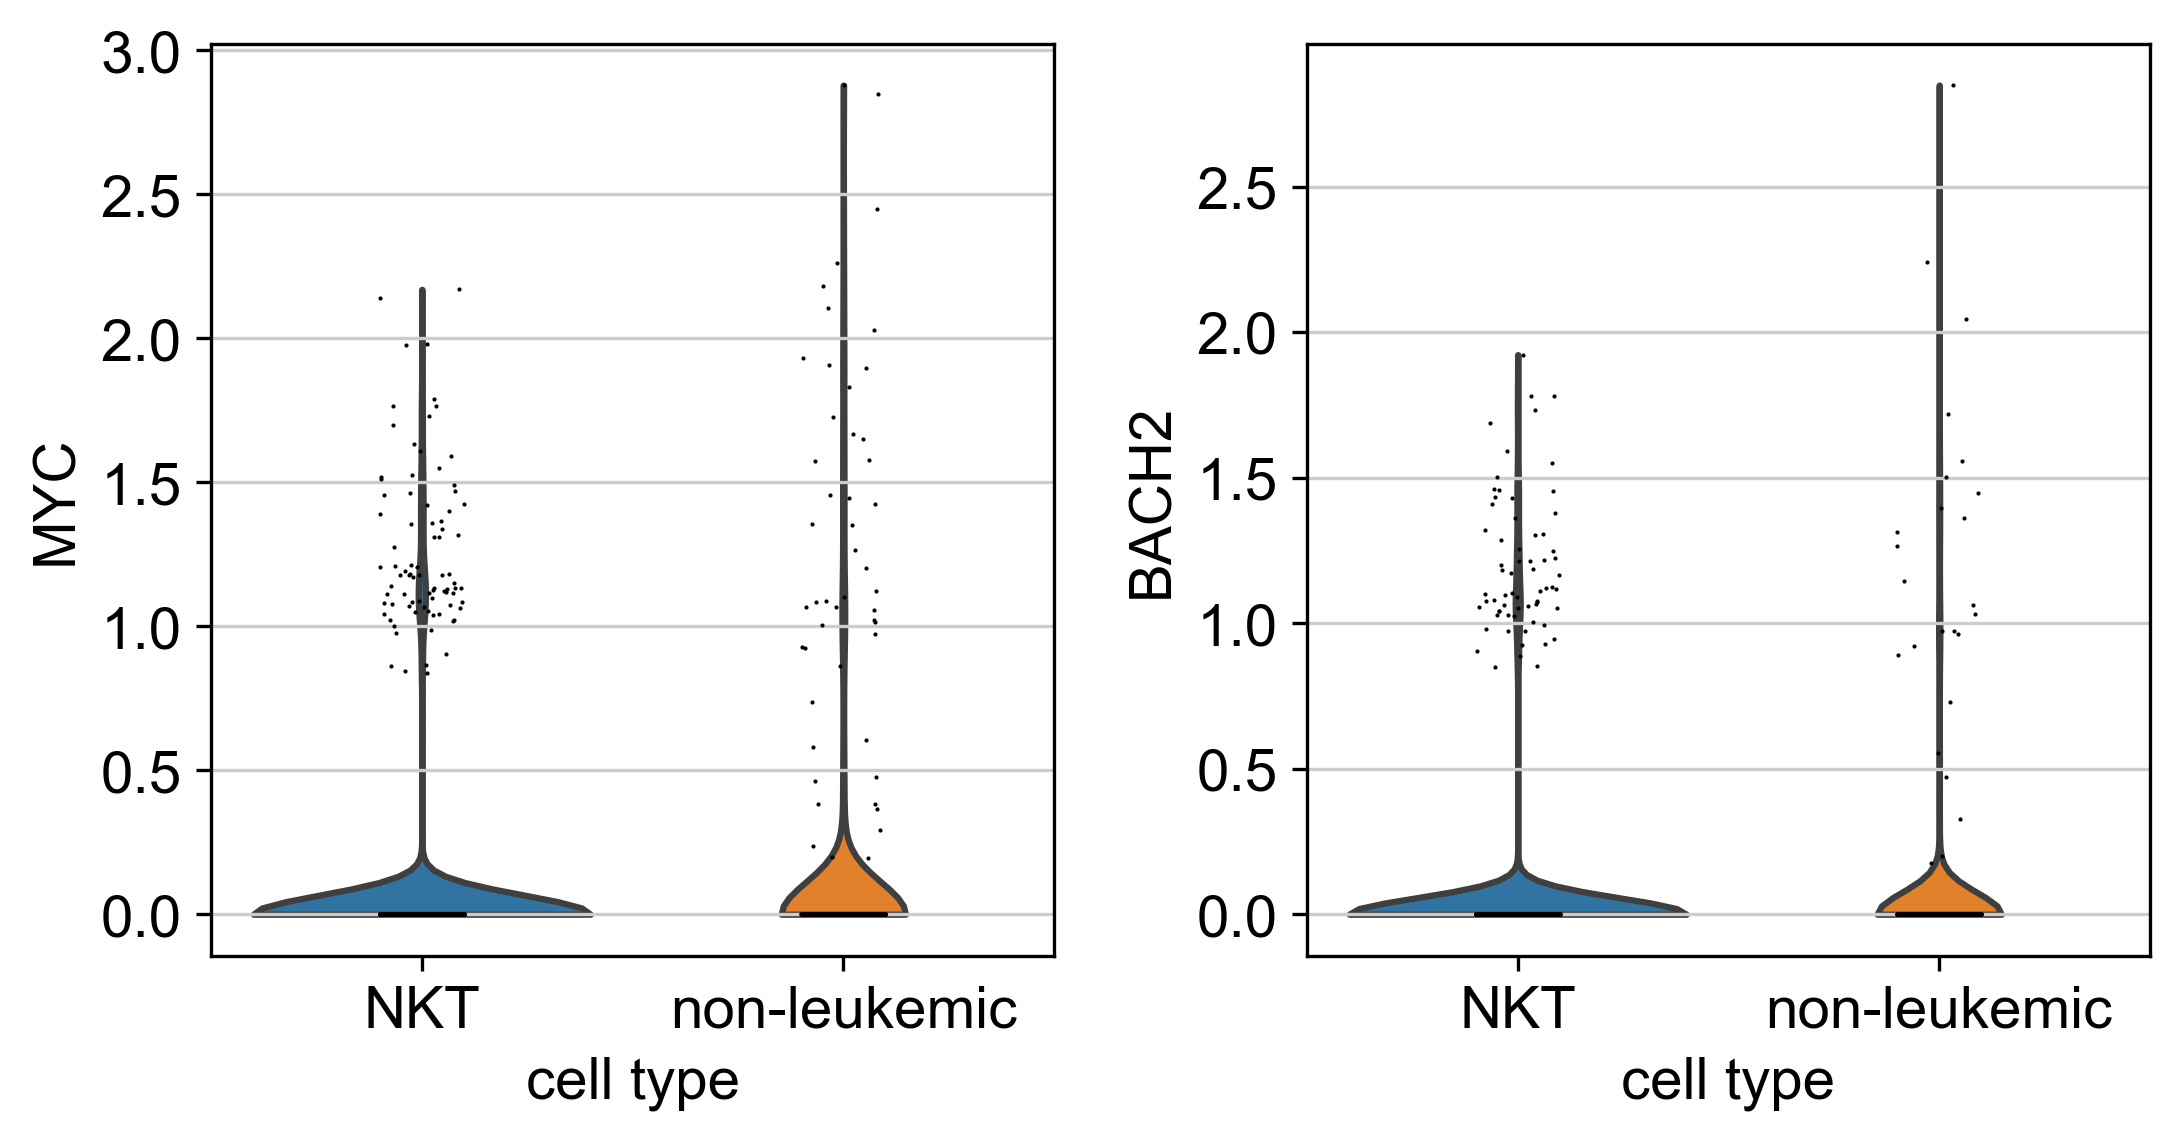

In [98]:
sc.pl.violin(adata, keys= nk_cd56_bright, groupby= 'cell_type', scale = 'count')


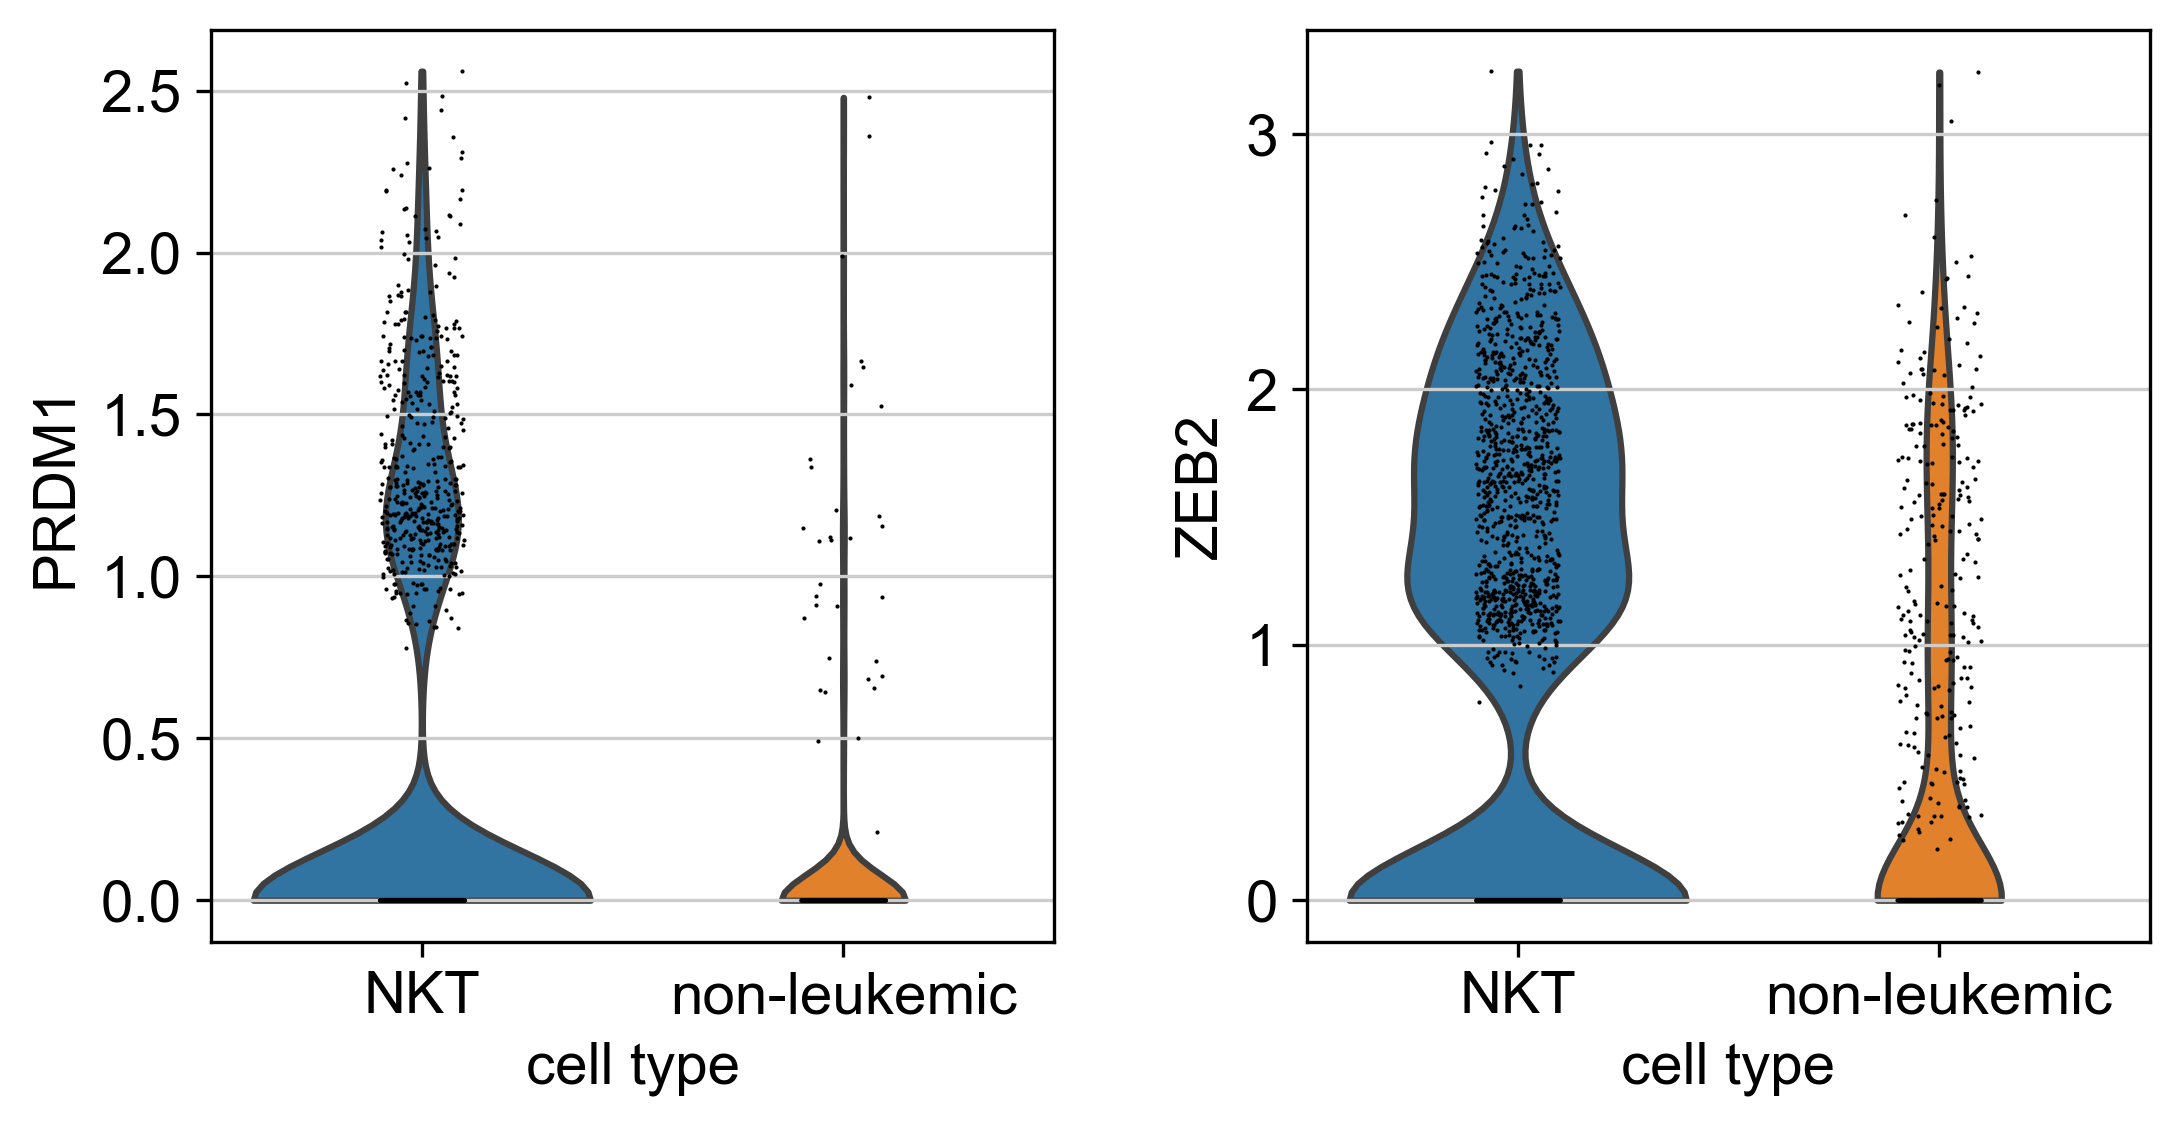

In [101]:
sc.pl.violin(adata, keys= nk_cd56_dim, groupby= 'cell_type', scale = 'count')



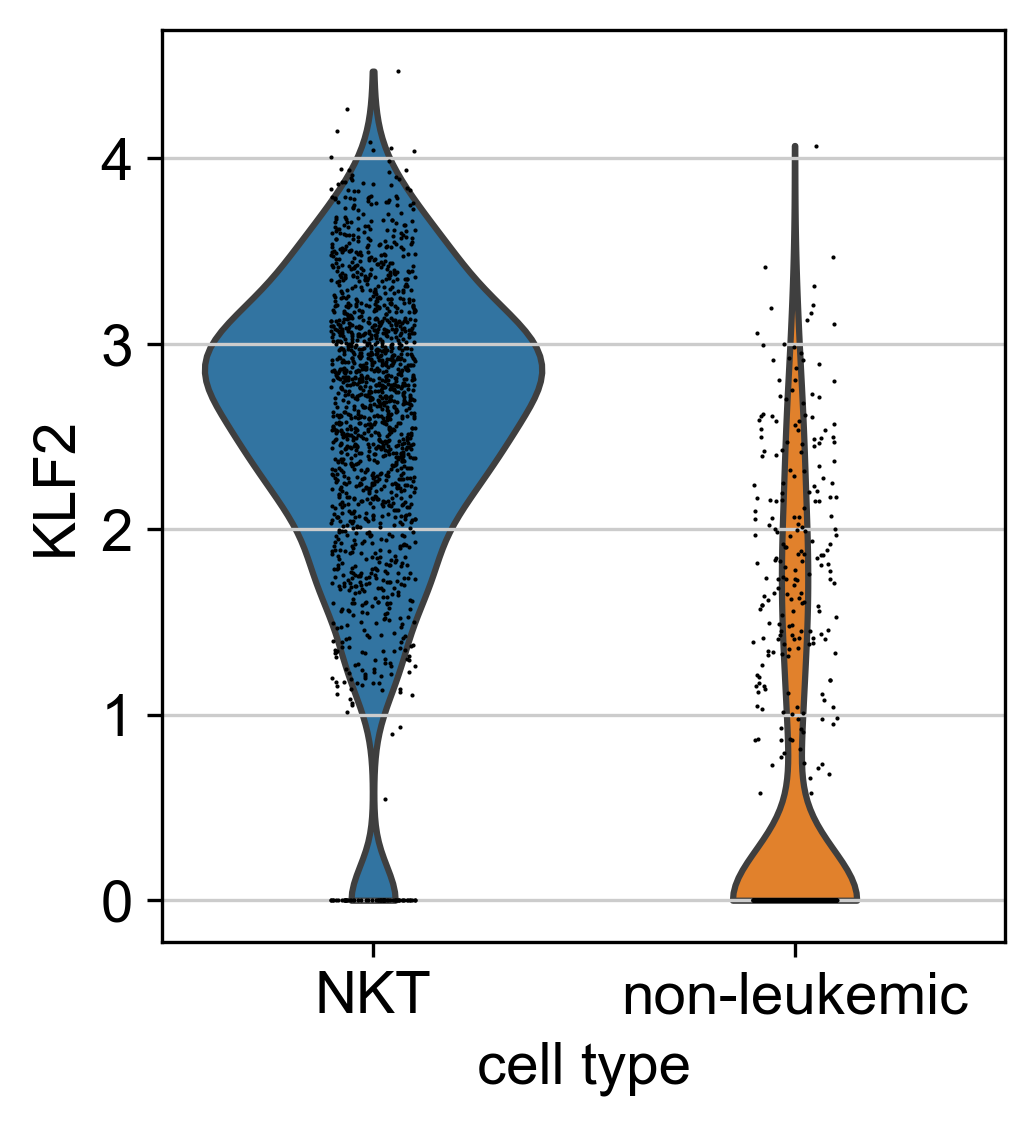

In [102]:
sc.pl.violin(adata, keys= nk_adaptive, groupby= 'cell_type', scale = 'count')

